In [1]:
import os 
import numpy as np 
import scipy.linalg as LA
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [3]:
dats = [fn for fn in os.listdir('../Synthetic/SaveData/LK_PRE_ST_FULL/') if fn.endswith('.dat') and '500' in fn and len(fn)==26]
# Sort the list based on MB offset
dats.sort(key=lambda i: float(i.split('_')[-2]))

MB_PRE = []
for i, dat in enumerate(dats): 
    dat = np.loadtxt('../Synthetic/SaveData/LK_PRE_ST_FULL/{}'.format(dat))
    dat = dat.reshape(-1,101,11)
    dat[:,:,7][dat[:,:,7] < dat[:,:,8]+10] = dat[:,:,8][dat[:,:,7] < dat[:,:,8]+10]
    
    MB_PRE.append(dat)

del_bd = np.linspace(0,2.25,len(MB_PRE)+1)

# Convergence Figures

In [4]:
PuBu = plt.cm.viridis(np.linspace(0,1,len(del_bd)))
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

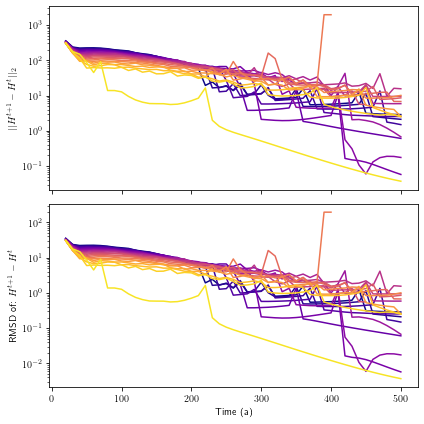

In [5]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    ax[0].plot((dat[1:,0,0]+4)*2,LA.norm(dat[1:,:,7] - dat[:-1,:,7],axis=1,ord=2),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[0].set_ylabel(r'$||H^{t+1} - H^{t}||_2$')
    ax[0].set_yscale('log')
    #ax[0].grid( which='both')
    
    ax[1].plot((dat[1:,0,0]+4)*2, 
               np.sqrt(np.mean((dat[1:,:,7] - dat[:-1,:,7])**2 ,axis=1)),
               color=plasma[i],
               label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]))
    
    ax[1].set_ylabel('RMSD of: $H^{t+1} - H^{t}$')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Time (a)')

    #ax[1].grid( which='both')

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_converge.png',dpi=300,bbox_inches='tight')

# Length and Area timeseries

In [6]:
plasma = plt.cm.plasma(np.linspace(0,1,len(del_bd)))

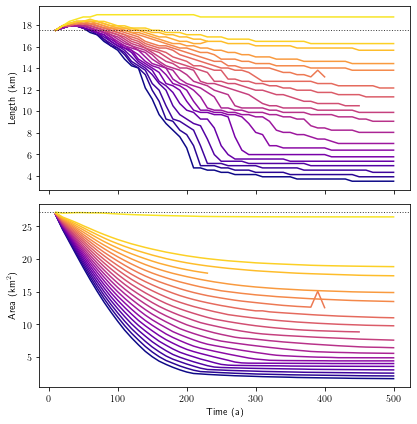

In [7]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero(dat[:,:,7 ] > dat[:,:,8],axis=1)*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/1000.0, axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Area (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline(np.count_nonzero(dat[0,:,7 ] > dat[0,:,8])*206/1000.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(np.trapz((dat[0,:,7] - dat[0,:,8])/1000.0), linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_length.png',dpi=300,bbox_inches='tight')

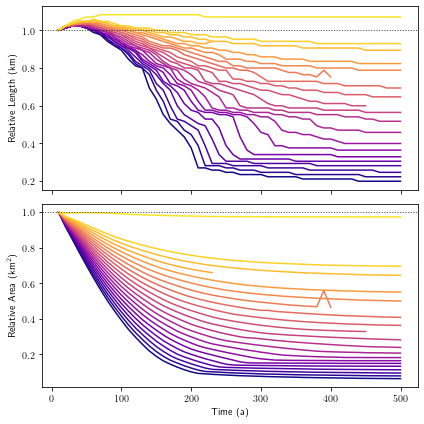

In [7]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6.0,6.0))

for i in range(len(MB_PRE)):
    dat = MB_PRE[i]
    L = np.count_nonzero(dat[:,:,7 ] > dat[:,:,8],axis=1)/np.count_nonzero(dat[0,:,7 ] > dat[0,:,8])#*206/1000.0
    ax[0].plot((dat[:,0,0]+4)*2, L,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[0].set_ylabel('Relative Length (km)')

    integrated = np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1)
    ax[1].plot((dat[:,0,0]+4)*2,integrated,label='$\Delta \dot b =$ {:1.2f}'.format(del_bd[i]),color=plasma[i])
    ax[1].set_ylabel('Relative Area (km$^2$)')
    ax[1].set_xlabel('Time (a)')
    
    
ax[0].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)
ax[1].axhline(1.0, linestyle=':',color='k',alpha=0.75,lw=1.0)

#ax[0].legend(title='(m a$^{-1}$)',fontsize='small');

fig.tight_layout()
fig.savefig('../plots/LK_PRE_MB_length_norm.png',dpi=300,bbox_inches='tight')

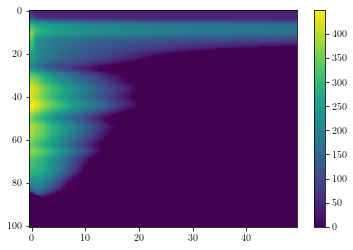

In [8]:
fig, ax = plt.subplots(1,1)

im = ax.imshow((MB_PRE[0][:,:,7] - MB_PRE[0][:,:,8]).T,aspect='auto')
fig.colorbar(im)

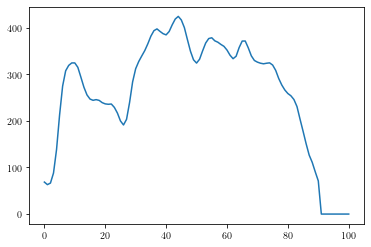

In [9]:
plt.plot((MB_PRE[-1][-1,:,7] - MB_PRE[-1][-1,:,8]))

In [10]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [11]:
dat = MB_PRE[0]
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_xlim(dat[0,:,4].min(),dat[0,:,4].max())
ax.set_ylim(dat[0,:,8].min()-25, dat[0,:,8].max()+200)
ax.set_ylabel('m a.s.l.')
ax.set_xlabel('x-coord (m)')


ax.plot(dat[0,:,4],dat[0,:,7])
ax.plot(dat[0,:,4],dat[0,:,8])
line1, = ax.plot([], [], lw=2, color='lightblue',label='Upwind')

line = [line1]

def animate(i):  
    line[0].set_data(dat[0,:,4], dat[i,:,7])
    return line

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,dat.shape[0]), interval=10, blit=True)
plt.close()
anim

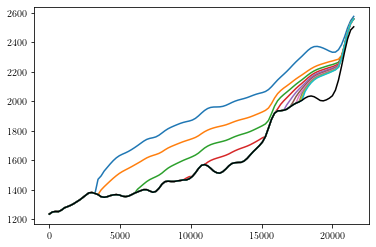

In [12]:
fig, ax = plt.subplots()

for t in range(0,dat.shape[0],5):
    ax.plot(dat[t,:,4], dat[t,:,7])
    
ax.plot(dat[t,:,4], dat[t,:,8],'k')

fig.savefig('../plots/test.png',dpi=300)

In [13]:
dat[-1,:,4]

array([21500., 21285., 21070., 20855., 20640., 20425., 20210., 19995.,
       19780., 19565., 19350., 19135., 18920., 18705., 18490., 18275.,
       18060., 17845., 17630., 17415., 17200., 16985., 16770., 16555.,
       16340., 16125., 15910., 15695., 15480., 15265., 15050., 14835.,
       14620., 14405., 14190., 13975., 13760., 13545., 13330., 13115.,
       12900., 12685., 12470., 12255., 12040., 11825., 11610., 11395.,
       11180., 10965., 10750., 10535., 10320., 10105.,  9890.,  9675.,
        9460.,  9245.,  9030.,  8815.,  8600.,  8385.,  8170.,  7955.,
        7740.,  7525.,  7310.,  7095.,  6880.,  6665.,  6450.,  6235.,
        6020.,  5805.,  5590.,  5375.,  5160.,  4945.,  4730.,  4515.,
        4300.,  4085.,  3870.,  3655.,  3440.,  3225.,  3010.,  2795.,
        2580.,  2365.,  2150.,  1935.,  1720.,  1505.,  1290.,  1075.,
         860.,   645.,   430.,   215.,     0.])

Text(0.5, 0, 'Time (a)')

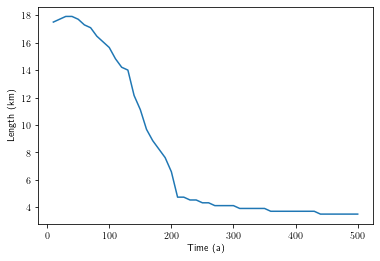

In [14]:
L = np.count_nonzero(dat[:,:,7 ] > dat[:,:,8],axis=1)*206/1000.0

plt.plot((dat[:,0,0]+4)*2, L)
plt.ylabel('Length (km)')
plt.xlabel('Time (a)')

In [15]:
dat.shape

(50, 101, 11)

Text(0.5, 0, 'Time (a)')

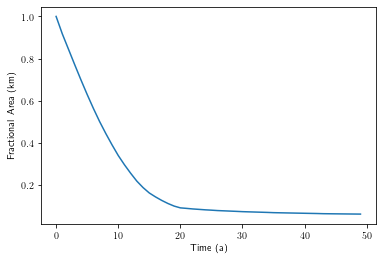

In [16]:
    
plt.plot(np.trapz((dat[:,:,7] - dat[:,:,8])/np.trapz(dat[0,:,7] - dat[0,:,8]), axis = 1))
plt.ylabel('Fractional Area (km)')
plt.xlabel('Time (a)')

In [17]:
np.trapz((dat[:,:,7] - dat[:,:,8])/1000, axis = 1).shape

(50,)

In [18]:
np.trapz(dat[0,:,7] - dat[0,:,8],)

26732.073107000004

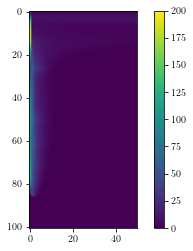

In [19]:
plt.imshow(np.apply_along_axis(np.sqrt,1,dat[:,:,9]**2+ dat[:,:,10]**2).T,clim=(0,200))
plt.colorbar()

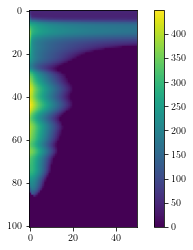

In [20]:
plt.imshow((dat[:,:,7] - dat[:,:,8]).T)
plt.colorbar()